# Exercise H6.1: Kurtosis of Toy Data
The file distrib.mat contains three toy datasets (uniform, normal, laplacian)1.
Each is made up of 10; 000 samples with 2 sources (i.e. N = 2; p = 10; 000).


You are asked to do the following for each dataset:

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = io.loadmat('distrib.mat')

In [14]:
data['normal'].shape

(2, 10000)

In [24]:
x = {}
x['normal']=data['normal']
x['laplacian'] = data['laplacian']
x['uniform']=data['uniform']

### Part (a) 

Apply the following mixing matrix A to the original sources s:
x = As

In [29]:
A = [[4 ,3],[2, 1]]

In [36]:
key_list = x.keys()

In [37]:
mix_x={}
for key in key_list:
    mix_x[key] = A@x[key]

### Part (b) 
Center the mixtures x to zero mean.

In [44]:
center_x = {}
for key in key_list:
    center_x[key] = mix_x[key]-mix_x[key].mean(axis=1)[:,np.newaxis]

### Part (c) 

- Decorrelate the mixtures from (b) by applying principal component analysis (PCA) on them
- project them onto the PCs.

In [48]:
cov_x = {}
eigen_val = {}
eigen_vec = {}
for key in key_list:
    cov_x[key] = np.cov(mix_x[key])
    eigen_val[key], eigen_vec[key] = np.linalg.eig(cov_x[key])


In [59]:
np.linalg.norm(eigen_vec['normal']/np.linalg.norm(eigen_vec['normal']))

1.0

In [63]:
M = {}
Sig = {}
for key in key_list:
    norm = np.linalg.norm(eigen_vec[key])
    M[key] = eigen_vec[key]/norm
    Sig[key] = np.diag(eigen_val[key]**(1/2))

In [65]:
v = {}
for key in key_list:
    v[key] = np.linalg.inv(Sig[key]) @ M[key].T @ center_x[key]

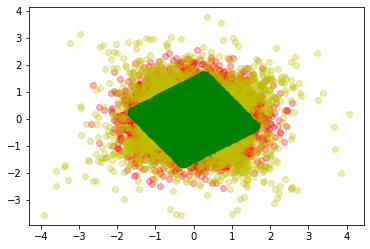

In [82]:
colors = ['r','y','g']
for i, key in enumerate(key_list):
    plt.scatter(v[key][0],v[key][1], color=colors[i],alpha=0.3)

### Part (d) 

Scale the decorrelated mixtures from (c) to unit variance in each PC direction. The mixtures
are now whitened (sphered).

<img src="img.png">


In [84]:
scale_x = {}
for key in key_list:
    scale_x[key] = (v[key] / np.std(v[key])

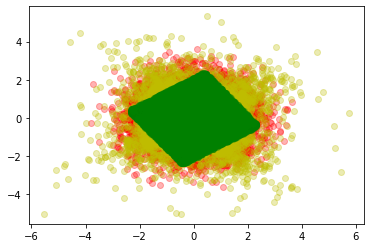

In [85]:
colors = ['r','y','g']
for i, key in enumerate(key_list):
    plt.scatter(scale_x[key][0],scale_x[key][1], color=colors[i],alpha=0.3)

### Part (e) 
Rotate the whitened mixtures by different angles 
<img src="img1.png">
and calculate the (excess) kurtosis2 empirically for each dimension in x:
<img src="img2.png">

In [92]:
def R(theta):
    rotation = [[np.cos(theta), -np.sin(theta)], 
                [np.sin(theta), np.cos(theta)]]
    return rotation

In [122]:
thetas = np.linspace(0, 2*np.pi, num=100, retstep=True)[0]

In [123]:
R_theta = {}
kurt_x_theta = {}
for key in key_list:
    x = scale_x[key]
    kurt_x = []
    for theta in thetas:
        x_theta = R(theta)@x
        kurt = np.mean(x_theta**4,axis=1)-3*np.mean(x_theta**2,axis=1)**2
        kurt_x.append(kurt)
    kurt_x_theta[key] = kurt_x

### Part (f) 
Find the minimum and maximum kurtosis value for the first dimension and rotate the data accordingly.
- Plot the original dataset (sources) and the mixtures after the steps (a), (b), (c), (d), and (f) as a scatter plot and display the respective marginal histograms.

In [159]:
max_theta = []
for key in key_list:
    loc = np.argmax(kurt_x_theta[key],axis=0)[0]
    max_theta.append(loc)

In [160]:
min_theta = []
for key in key_list:
    loc = np.argmin(kurt_x_theta[key],axis=0)[0]
    min_theta.append(loc)

In [161]:
max_theta

[38, 89, 77]

In [140]:
max_theta_x = {}
for i, key in enumerate(key_list):
    max_theta_x[key] = R(max_theta[i])@scale_x[key]

In [139]:
min_theta_x = {}
for i, key in enumerate(key_list):
    min_theta_x[key] = R(min_theta[i])@scale_x[key]

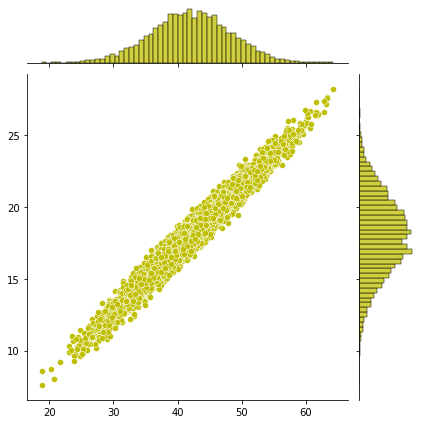

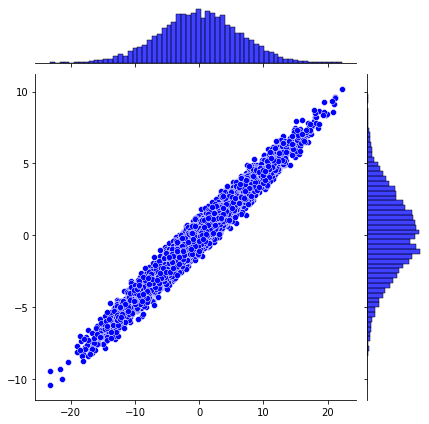

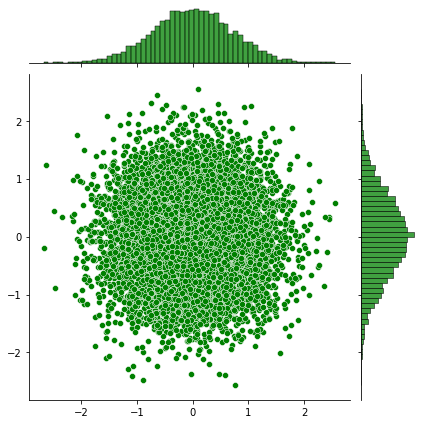

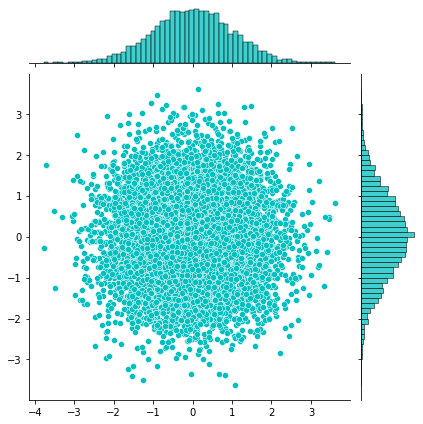

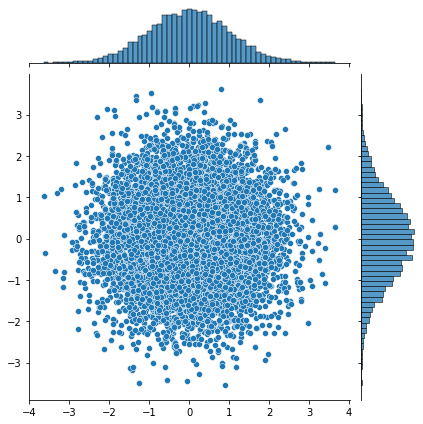

In [189]:
key = 'normal'
sns.jointplot(ax=axes[0],x=mix_x[key][0], y=mix_x[key][1], kind='scatter',color='y')
sns.jointplot(ax=axes[1], x=center_x[key][0], y=center_x[key][1], kind='scatter',color='b')
sns.jointplot(ax=axes[2],x=v[key][0], y=v[key][1], kind='scatter',color='g')
sns.jointplot(ax=axes[3],x=scale_x[key][0], y=scale_x[key][1], kind='scatter',color='c')
sns.jointplot(ax=axes[4],x=min_theta_x[key][0], y=min_theta_x[key][1], kind='scatter')


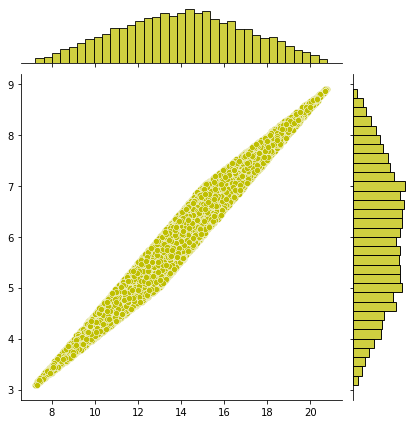

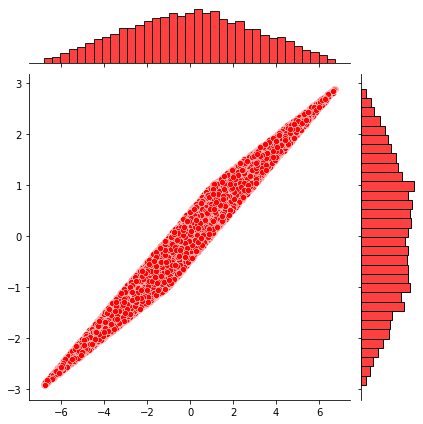

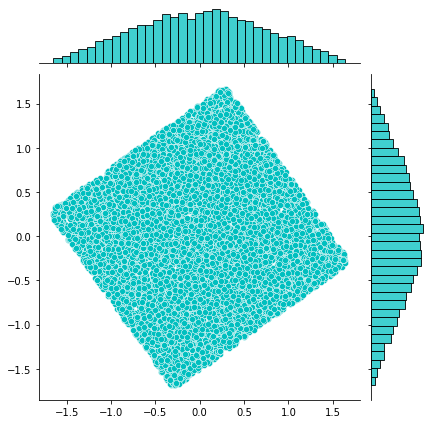

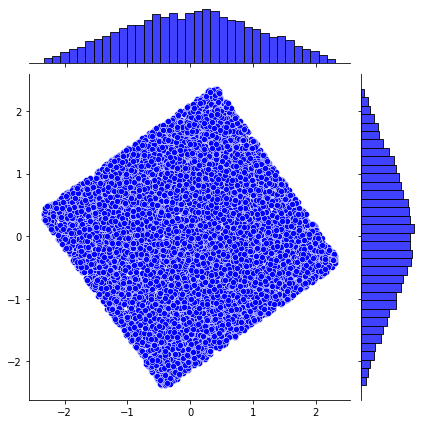

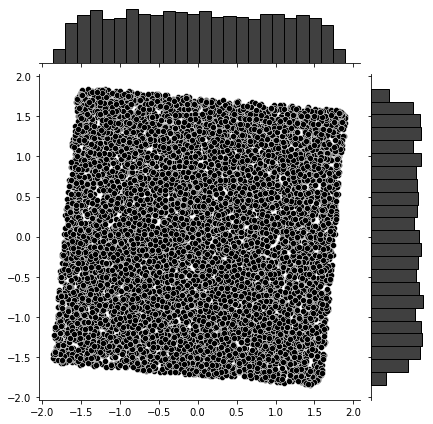

In [182]:
key = 'uniform'
sns.jointplot(ax=axes[0],x=mix_x[key][0], y=mix_x[key][1], kind='scatter',color='y')
sns.jointplot(ax=axes[1], x=center_x[key][0], y=center_x[key][1], kind='scatter',color='r')
sns.jointplot(ax=axes[2],x=v[key][0], y=v[key][1], kind='scatter',color='c')
sns.jointplot(ax=axes[3],x=scale_x[key][0], y=scale_x[key][1], kind='scatter',color='b')
sns.jointplot(ax=axes[4],x=min_theta_x[key][0], y=min_theta_x[key][1], kind='scatter',color='k')


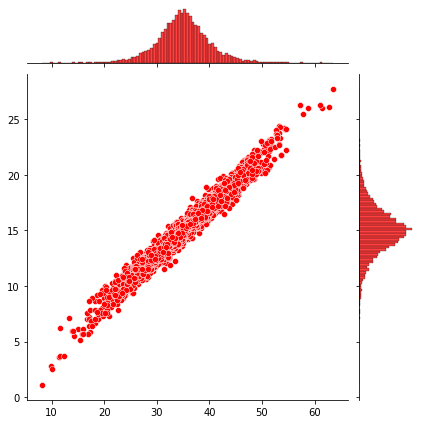

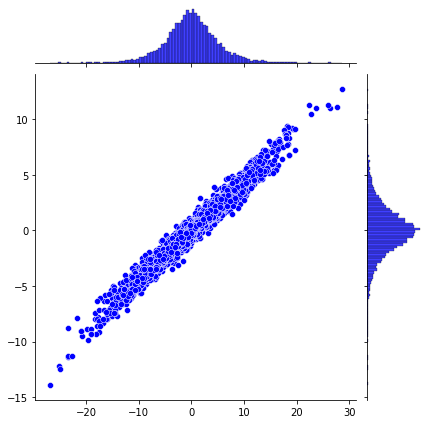

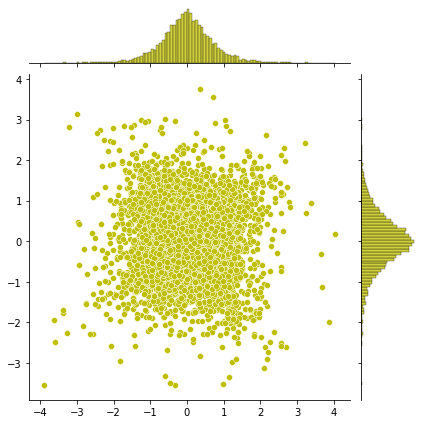

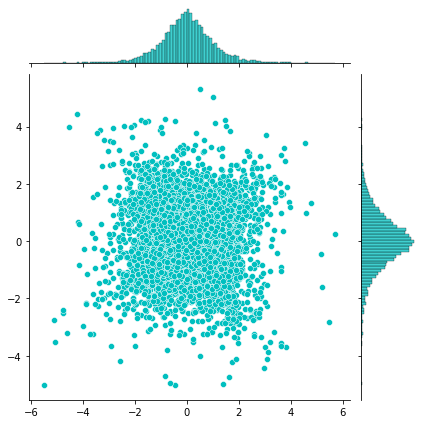

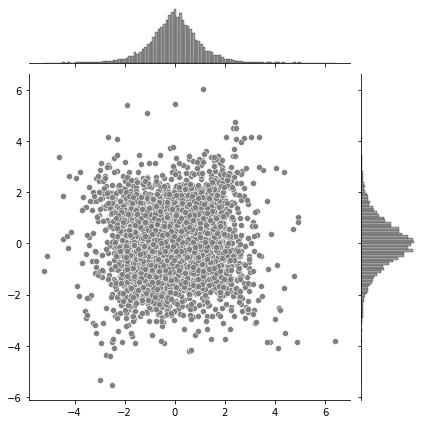

In [185]:
key = 'laplacian'
sns.jointplot(ax=axes[0],x=mix_x[key][0], y=mix_x[key][1], kind='scatter',color='r')
sns.jointplot(ax=axes[1], x=center_x[key][0], y=center_x[key][1], kind='scatter',color='b')
sns.jointplot(ax=axes[2],x=v[key][0], y=v[key][1], kind='scatter',color='y')
sns.jointplot(ax=axes[3],x=scale_x[key][0], y=scale_x[key][1], kind='scatter',color='c')
sns.jointplot(ax=axes[4],x=min_theta_x[key][0], y=min_theta_x[key][1], kind='scatter',color='grey')


- For step (e) plot the kurtosis value kurt(x) of each dimension in x as a function of the rotation angle theta for each dimension.

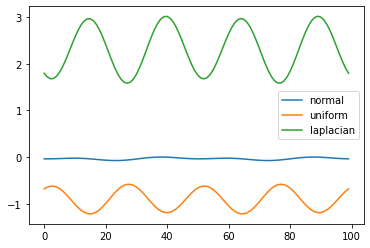

In [211]:
plt.plot(np.array(kurt_x_theta['normal'])[:,0])
plt.plot(np.array(kurt_x_theta['uniform'])[:,0])
plt.plot(np.array(kurt_x_theta['laplacian'])[:,0])
plt.legend(['normal','uniform','laplacian'])

- Compare the histograms after rotation by theta_min and theta_max for the different distributions.

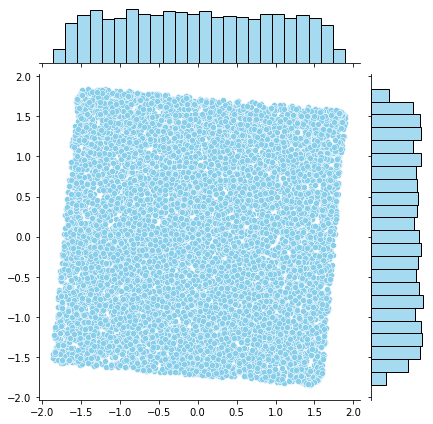

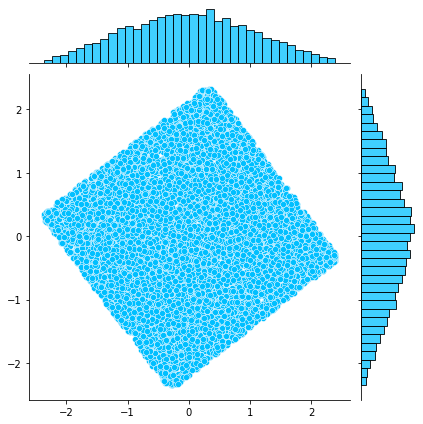

In [220]:
key = 'uniform'
sns.jointplot(x=min_theta_x[key][0], y=min_theta_x[key][1], kind='scatter',color = 'skyblue')
sns.jointplot(x=max_theta_x[key][0], y=max_theta_x[key][1], kind='scatter',color = 'deepskyblue')

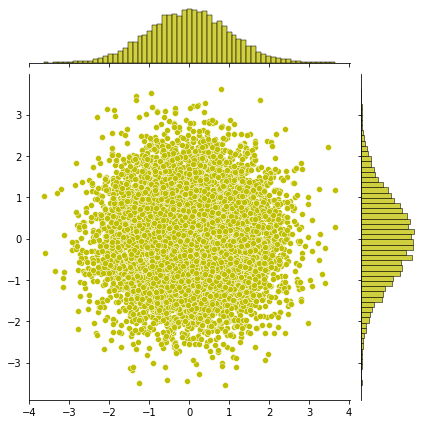

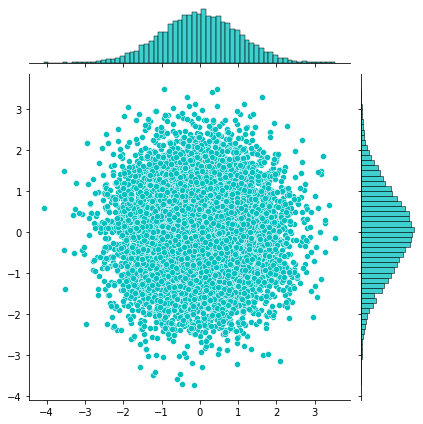

In [219]:
key = 'normal'
sns.jointplot(x=min_theta_x[key][0], y=min_theta_x[key][1], kind='scatter',color='y')
sns.jointplot(x=max_theta_x[key][0], y=max_theta_x[key][1], kind='scatter',color='c')

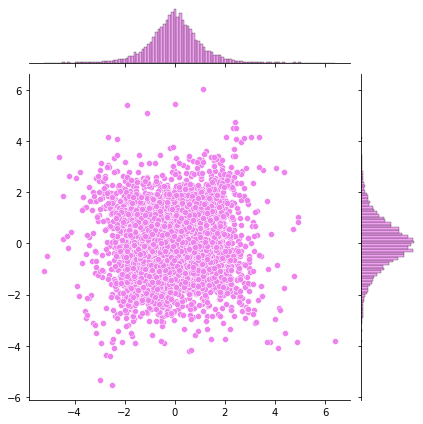

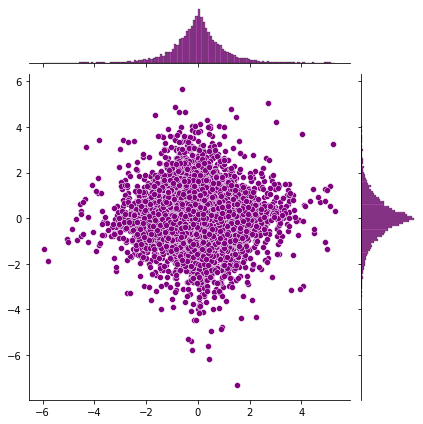

In [221]:
key = 'laplacian'
sns.jointplot(x=min_theta_x[key][0], y=min_theta_x[key][1], kind='scatter',color= 'violet')
sns.jointplot(x=max_theta_x[key][0], y=max_theta_x[key][1], kind='scatter',color = 'purple')